In [1]:

import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('data.csv')
len(df)

11914

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')



Exploratory Data Analysis

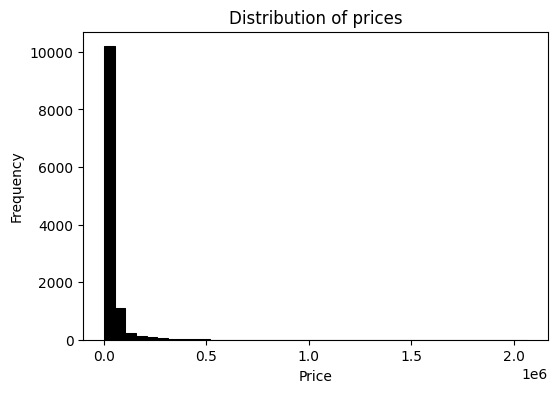

In [6]:
plt.figure(figsize=(6, 4))

sns.histplot(df.msrp, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

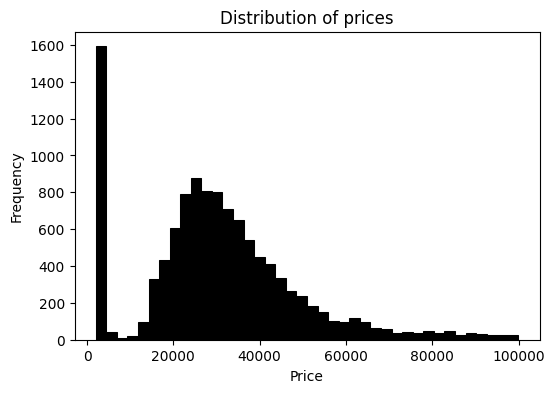

In [7]:
plt.figure(figsize=(6, 4))

sns.histplot(df.msrp[df.msrp < 100000], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

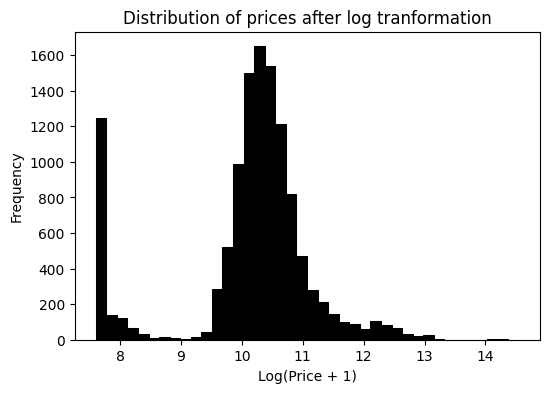

In [8]:
log_price = np.log1p(df.msrp)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

In [9]:
df.isnull().sum()


make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

Validation !!!

In [10]:
np.random.seed(2)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [11]:
y_train_orig = df_train.msrp.values
y_val_orig = df_val.msrp.values
y_test_orig = df_test.msrp.values

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

del df_train['msrp']
del df_val['msrp']
del df_test['msrp'] 

In [12]:
def linear_regression(xi):
    n = len(xi)    
    pred = w0
     
    for j in range(n):
        pred = pred + w[j] * xi[j]
     
    return pred
 
# sample values for w0 and w and the given xi
xi = [138, 24, 1385]
w0 = 0
w = [1, 1, 1]
 
linear_regression(xi)

w0 = 7.17
w = [0.01, 0.04, 0.002]
linear_regression(xi)

12.280000000000001

In [13]:
np.expm1(12.280000000000001)

np.float64(215344.7166272456)

Vector-Multiplication

In [14]:
def dot(xi, w):
    n = len(xi)
     
    res = 0.0
    for j in range(n):
        res = res + xi[j] * w[j]
         
    return res

In [15]:
def linear_regression(xi):
    return w0 + dot(xi, w) 

In [16]:
xi = [138, 24, 1385]
w0 = 7.17
w = [0.01, 0.04, 0.002]
 
# adding w0 to the vector w
w_new = [w0] + w
w_new
# Output: [7.17, 0.01, 0.04, 0.002]
 
xi
# Output: [138, 24, 1385]

[138, 24, 1385]

In [17]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)
 
linear_regression(xi)

12.280000000000001

In [18]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]
X = [x1, x2, x10]
X = np.array(X)
X


array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [19]:
y = X.dot(w_new)

In [20]:
np.expm1(y)

array([237992.82334859, 768348.51018973, 222347.22211011])

In [21]:
def linear_regression(X):
    return X.dot(w_new)
 
y = linear_regression(X)
np.expm1(y) 

array([237992.82334859, 768348.51018973, 222347.22211011])

In [22]:
X =[
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 83],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],  
]
 
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   83],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [23]:
ones = np.ones(9)
ones
# Output: array([1., 1., 1., 1., 1., 1., 1., 1., 1.])
 
# X.shape[0] looks at the number of rows and creates the vector of ones
ones = np.ones(X.shape[0])
ones
np.column_stack([ones, ones])
X = np.column_stack([ones, X])
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]

In [24]:
# GRAM MATRIX
XTX = X.T.dot(X)
 
# Inverse GRAM MATRIX
XTX_inv = np.linalg.inv(XTX)

In [25]:
# Without round(1) it's not exactly identity matrix but the other values 
# are very close to 0 --> we can treat them as 0 and take it as identity matrix
XTX.dot(XTX_inv)
# Output:
#array([[ 1.00000000e+00,  2.60208521e-18,  4.85722573e-, 1.08420217e-18],
#       [ 4.54747351e-13,  1.00000000e+00,  1.50990,2.22044605e-16],
#       [ 5.68434189e-14,  1.11022302e-16,  1.00000000e,3.46944695e-17],
#       [ 9.09494702e-13,  0.00000000e+00, -2.13162821e-14,
       #  1.00000000e+00]])
 
# This gives us the I matrix
XTX.dot(XTX_inv).round(1)
# Output: 
# array([[ 1.,  0.,  0.,  0.],
#             [ 0.,  1.,  0.,  0.],
#             [ 0.,  0.,  1.,  0.],
#             [ 0.,  0., -0.,  1.]])

array([[ 1.,  0.,  0.,  0.],
       [-0.,  1.,  0.,  0.],
       [-0., -0.,  1.,  0.],
       [-0.,  0., -0.,  1.]])

In [26]:
# w_full contains all the weights
w_full = XTX_inv.dot(X.T).dot(y)
w_full
# Output: array([ 3.00092529e+04, -2.27839691e+01, -2.57690874e+02, -2.30322797e+00])
w0 = w_full[0]
w = w_full[1:]
w0, w
# Output: (30009.25292276666, array([ -22.78396914, -257.69087426,   -2.30322797]))


(np.float64(30009.252922766562),
 array([ -22.78396914, -257.69087426,   -2.30322797]))

w = ((XTX)⁻1).(XT)(y)

In [27]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]

In [28]:
X =[
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 83],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],  
]
 
X = np.array(X)
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]
 
train_linear_regression(X, y)
# Output: (30009.25292276666, array([ -22.78396914, -257.69087426,   -2.30322797]))


(np.float64(30009.252922766562),
 array([ -22.78396914, -257.69087426,   -2.30322797]))

In [29]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [31]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [32]:

base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
 
df_train[base].head()


,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
2735,148.0,4.0,33,24,1385
6720,132.0,4.0,32,25,2031
5878,148.0,4.0,37,28,640
11190,90.0,4.0,18,16,873
4554,385.0,8.0,21,15,5657


In [33]:
X_train = df_train[base].values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]], shape=(7150, 5))

In [34]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [36]:
df_train[base].fillna(0).isnull().sum()
X_train = df_train[base].fillna(0).values
X_train

w0, w = train_linear_regression(X_train, y_train)
w0, w

(np.float64(7.927257388069986),
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [37]:
y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111], shape=(7150,))

<Axes: ylabel='Count'>

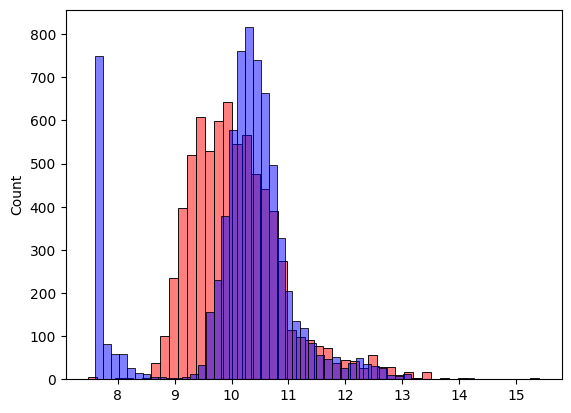

In [38]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

2.9 RMSE

In [39]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [40]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

In [41]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

# Training part:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
 
# Validation part:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
# Evaluation part:
rmse(y_val, y_pred)
# Output: 0.7328022115111966

np.float64(0.761653099130156)

Feature Engineering

In [42]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
 
def prepare_X(df):
    df = df.copy()
     
    df['age'] = 2017 - df.year
    features = base + ['age']
     
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X
 
X_train = prepare_X(df_train)
X_train

array([[1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00],
       [1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03, 5.000e+00],
       [1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02, 1.000e+00],
       ...,
       [2.850e+02, 6.000e+00, 2.200e+01, 1.700e+01, 5.490e+02, 2.000e+00],
       [5.630e+02, 1.200e+01, 2.100e+01, 1.300e+01, 8.600e+01, 3.000e+00],
       [2.000e+02, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02, 0.000e+00]],
      shape=(7150, 6))

In [43]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)

np.float64(0.5172055461058299)

<Axes: ylabel='Count'>

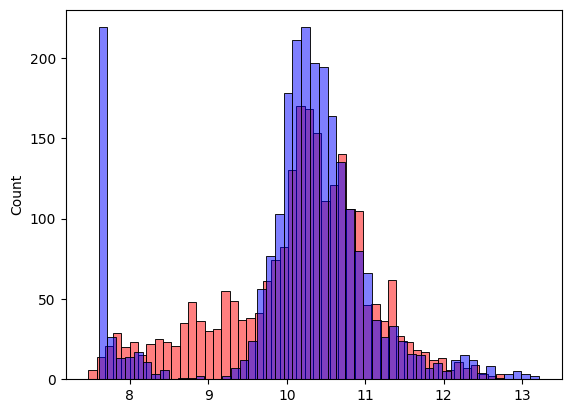

In [44]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)


In [45]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
     
    df['age'] = 2017 - df.year
    features.append('age')
     
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
     
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X
 
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]], shape=(7150, 9))

In [46]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)
# Ouput: 0.5139733981046036

np.float64(0.515799564150169)

In [48]:
df.make.nunique() 
# Output: 48
 
df.make

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: object

In [49]:
df.make.value_counts().head()

make
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: count, dtype: int64

In [50]:
df.make.value_counts().head().index

Index(['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'], dtype='object', name='make')

In [51]:
makes = list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [ ]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
     
    df['age'] = 2017 - df.year
    features.append('age')
     
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
         
    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)
     
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

In [52]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)
# Output: 0.5058837299788781

np.float64(0.515799564150169)

In [55]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 
    'market_category', 'vehicle_size', 'vehicle_style'
]
 
# The dictionary category will contain for each of the categories 
# the top 5 most common ones
categories = {}
 
for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)
     
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [ ]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 
    'market_category', 'vehicle_size', 'vehicle_style'
]
 
# The dictionary category will contain for each of the categories 
# the top 5 most common ones
categories = {}
 
for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [56]:
def prepare_X(df):
    # this is good way to do, otherwise while using df you'll modify the original data
    # what is mostly not wanted
    df = df.copy()
    features = base.copy()
     
    df['age'] = 2017 - df.year
    features.append('age')
     
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
 
    # First loop is for each key of the dictionary categories.
    # Second loop is for each value inside the categories
    # For each of this values we create a new column.
    for c, values in categories.items():    
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))
     
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

In [57]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)
# Output: 292.5054633101075

np.float64(23.019020704791835)

In [58]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
     
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]

In [59]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)

np.float64(0.45652199012897743)